# 4: Perform
In this assignment, you will demonstrate your mastery of aggregating and summarizing data with Pandas `groupby` and `pivot_table` and merging/joining datasets using Pandas `concat` and `merge`.

## Part 1: COVID-19 Dataset
In this part we work with the `covid_19_data.csv` dataset. It contains records of the cumulative numbers of confirmed cases of the disease (the `Confirmed` column), deaths from the disease (the `Deaths` column), and recovered individuals (the `Recovered` column). **Remember** that *cumulative* means total up to this date, i.e., a given observation is the previous observation plus any additional since then.

Each such value corresponds to a particular `Province/State` within a given `Country/Region`. Some rows do not include information at the `Province/State` level, in which case the data correspond to the `Country/Region` as a whole. The date of the record is given in the `ObservationDate` column. Below we import the dataset and preview the first few rows. 

In [1]:
# Run but do not modify this code
import pandas as pd
covid = pd.read_csv("covid-19.csv", parse_dates=["ObservationDate"])
covid.head()

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [2]:
import numpy as np
covid

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
205946,2021-01-19,Zaporizhia Oblast,Ukraine,62492.0,738.0,39168.0
205947,2021-01-19,Zeeland,Netherlands,13031.0,149.0,0.0
205948,2021-01-19,Zhejiang,Mainland China,1316.0,1.0,1298.0
205949,2021-01-19,Zhytomyr Oblast,Ukraine,42758.0,707.0,37834.0


### Question 1 (12 points, 4 each)

1. Which `Country/Region` has reported the most total observations (rows), and how many did they report? Save the name of the Contry/Region in `q1_1_1` as `str`, and save the number they report in `q1_1_2` as `int` or `np.int64`.
2. How many `Country/Region`s have reported at least 100 `Deaths` due to COVID-19? Save your result in `q1_2`.
3. Which five `Province/State`s of the `Country/Region` of `Mainland China` have reported the most `Deaths` to date, and how many `Deaths` have they reported? Put your answer in `q1_3` such that it is of type `Series` where the index is the `Province/State` and the value is the number of `Deaths` as `float` or `np.float64`.

In [3]:
# Put your code to answer the question here
# Feel free to add additional cells
q1_1_1 = (covid.groupby("Country/Region").count()).sort_values(by="ObservationDate", ascending=False).index[0]
q1_1_2 = (covid.groupby("Country/Region").count()).sort_values(by="ObservationDate", ascending=False).loc["Russia"][0]

q1_2 = (covid.groupby("Country/Region").sum())[(covid.groupby("Country/Region").count())["Deaths"]>100].count()[0]

q1_3 = covid[covid["Country/Region"]=="Mainland China"].groupby("Province/State").sum().sort_values(by="Deaths", ascending=False)["Deaths"][0:5]

### Question 2 (8 points, 4 each)

1. Report the first five `Province/State`s within the `Country/Region` of `US` to record a `Confirmed` case along with the dates on which they recorded their first case(s). Put your answer in `q2_1` such that it is of type `Series` where the index is the `Province/State` and the value is the dates on which they recorded their first case(s) as `pandas._libs.tslibs.timestamps.Timestamp`.

2. All of the data for the `Country/Region` of `US` is recorded at the `Province/State` level. Create a Pandas Series called `q2_2` where the primary index has `ObservationDate`s and the values are the total `Confirmed` cases added up accross all of the `Province/State`s in the `Country/Region` of `US`. For example, the first several rows of the Series should look like:
```
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
```
When you are finished, print `q2_2.head()` and then run the following code cell to visualize the spread of the virus in the United States as a line plot.  

In [4]:
# Put your code to answer the question here
# Feel free to add additional cells
...
q2_1 = covid[covid["Country/Region"]=="US"].sort_values(by="ObservationDate")[["Province/State", "ObservationDate"]].set_index("Province/State")["ObservationDate"][0:5]

q2_2 = covid[covid["Country/Region"]=="US"].groupby("ObservationDate").sum()["Confirmed"]
print("2. ", q2_2.head())

2.  ObservationDate
2020-01-22    1.0
2020-01-23    1.0
2020-01-24    2.0
2020-01-25    2.0
2020-01-26    5.0
Name: Confirmed, dtype: float64


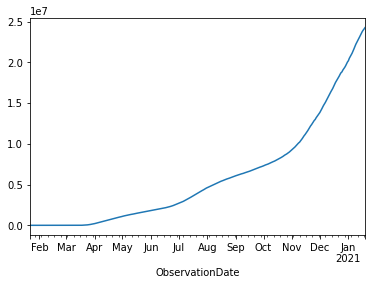

In [13]:
# Run but do not modify this code
# You should compute `q2_2` above for Q2.2
q2_2.plot()

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_2_manual
manual: true
points: 2
-->

<!-- END QUESTION -->



## Part 2: Movie Ratings
In this part we return to the movie review dataset that contains information about various users who have rated several different movies. To start, use `first_hundred.csv` contains all data for the first 100 `user_id`s (`1` through `100`) with all information merged into one table. Later, we will consider combining information from additional files with data on the subsequent `user_id`s. Below we import `first_hundred.csv` into the DataFrame `df_fh` and preview the first few rows.

In [6]:
# Run but do not modify this code
import pandas as pd
df_fh = pd.read_csv("first_hundred.csv")
df_fh

,user_id,age,sex,occupation,movie_id,rating,movie_title
0,1,24,M,technician,61,4,Three Colors: White (1994)
1,13,47,M,educator,61,4,Three Colors: White (1994)
2,18,35,F,other,61,4,Three Colors: White (1994)
3,58,27,M,programmer,61,5,Three Colors: White (1994)
4,59,49,M,educator,61,4,Three Colors: White (1994)
...,...,...,...,...,...,...,...
11014,100,36,M,executive,1238,2,Full Speed (1996)
11015,100,36,M,executive,1235,4,"Big Bang Theory, The (1994)"
11016,100,36,M,executive,1237,3,Twisted (1996)
11017,100,36,M,executive,1234,1,Chairman of the Board (1998)


### Question 3 (8 points, 4 each)
Use Pandas `pivot_table`s to answer the following about the data in `first_hundred.csv`.

1. For each of the five possible `rating` values (1 through 5) report how many ratings of that value were recorded for `sex=='M'` and for `sex=='F'`. That is, how many total ratings of `1` were given by women, how many total ratings of `2` were given by women, etc., and the same for men. Save your result in pivot table `q3_1`, the columns are `sex` and the rows are `rating`.

2. Compute the `decade` of a user to be their `age // 10` (where `//` stands for integer division in Python so that someone with `age` between 0 and 9 would have `decade` 0, between 10 and 19 would have `decade` 1, and so on). Create a pivot table that shows the total number of `rating`s in the dataset for each combination of `decade` and `sex`. That is, your pivot table should show how many total `rating`s were made by users who are `decade==0` and `sex=='F'`, `decade==1` and `sex=='F'`, etc., and the same for `sex=='M'` for each of the five possible `rating` values (1 through 5). Use the `fill_value=0` optional parameter to the Pandas `pivot_table` method so that combinations for which there are no ratings will be printed as 0.  Display your resulting pivot table. Put your result in pivot table `q3_2`, the columns are `sex` and the rows are `decade`.

In [7]:
# Put your code to answer the question here
# Feel free to add additional cells
q3_1 = df_fh.pivot_table("movie_id", index="rating", columns="sex", aggfunc='count')

df_fh["decade"]= df_fh["age"]//10
q3_2 = (df_fh.pivot_table("rating", index="decade", columns="sex", aggfunc='count', fill_value=0))

### Question 4 (12 points, 4 each)
`first_hundred.csv` only contains ratings from the first 100 `user_id`s containing about 11% of the total ratings. The remaining ratings are split across two additional files: `other_ratings_a.csv` and `other_ratings_b.csv`. In addition, information about additional users not in the first hundred is contained in the `other_users.csv` file, and information about all movies is contained in the `movies.csv` file. You will need to import and appropriately combine data from all of these datasets in order to answer the following questions. We encourage you to start by exploring the individual datasets.

1. What percentage of the ratings were made by women (i.e., `sex=='F'`)? Put your result in `q4_1` as a `float` or `np.float64`.
2. What are the `movie_title`s of the five movies that have received the most ratings? Put your answer in `q4_2` such that it is of type `Series` where the index is the `movie_title` and the value is the `rating` as `int` or `np.int64`.
3. Several movies have not received very many `rating`s; average ratings of such movies are not very informative. Instead, what are the `movie_title`s and average `rating`s of the movies that have received *at least 10* `rating`s? Show the five movies with the highest average `rating`. Put your answer in `q4_3` such that it is of type `Series` where the index is the `movie_title` and the value is the average rating as `float` or `np.float64`.

In [8]:
df_ou = pd.read_csv("other_users.csv")
df_ora = pd.read_csv("other_ratings_a.csv")
df_orb = pd.read_csv("other_ratings_b.csv")

In [9]:
# Put your code to answer the question here
# Feel free to add additional cells

#Q4.1 CODE
df_first_100_users = df_fh.groupby("user_id").first()
df_first_100_users.reset_index(level=0, inplace=True)
df_all_users = pd.concat([df_first_100_users[["user_id", "age", "sex", "occupation"]], df_ou])

df_all_ratings = pd.concat([df_fh[["user_id", "movie_id", "rating"]], df_ora])
df_all_ratings = pd.concat([df_all_ratings, df_orb])

df_all_info = pd.merge(df_all_ratings, df_all_users, how="left", on="user_id")


q4_1 = df_all_info["sex"].value_counts(normalize=True)["F"]



#Q4.2 CODE
top_five = df_all_info.groupby("movie_id").count().sort_values("user_id", ascending=False)[:5]
q4_2 = pd.merge(top_five, df_fh, on="movie_id").groupby("movie_id").first().set_index("movie_title")["user_id_x"]



#Q4.3 CODE
top_five_ratings = df_all_ratings.groupby("movie_id").filter(lambda x: len(x)>= 10).groupby("movie_id").mean().sort_values("rating", ascending=False)[:5]
q4_3 = pd.merge(top_five_ratings, df_fh, on="movie_id").groupby("movie_id").first().set_index("movie_title")["rating_x"]